In [3]:
#1. Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn.datasets as skdatasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso

In [4]:
#2. Load the csv data
df = pd.read_csv('garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [6]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [7]:
#display the category in each column
print(df['quarter'].unique())
print(df['day'].unique())
print(df['department'].unique())

['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
['sweing' 'finishing ' 'finishing']


In [8]:
#cleaning department column's error message for 'finishing' and 'finishing '
df.department = df.department.str.replace(' ', '')

In [9]:
#convert the columns into numeric 
df.replace({'department':{'sweing':0,'finishing':1}, 'day':{'Monday':1 ,'Tuesday':2 ,'Wednesday':3 ,'Thursday': 4 ,'Saturday':5 ,'Sunday': 6 }, 'quarter':{'Quarter1':1, 'Quarter2': 2, 'Quarter3':3, 'Quarter4':4, 'Quarter5':5}}, inplace=True)
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,1,0,4,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,1,1,4,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,1,0,4,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,1,0,4,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,1,0,4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [10]:
# Remove unwanted column
df.drop(['date'], axis=1, inplace= True)

In [11]:
#Inpute missing values

imputer = SimpleImputer( strategy='constant', fill_value=0)
df['wip'] = pd.Series(imputer.fit_transform(np.array(df['wip']).reshape(1, -1)).reshape(-1))

In [12]:
#convert the new column data into categorical
df[['quarter', 'department', 'day', 'team']] = df[['quarter', 'department', 'day', 'team']].apply(lambda x: x.astype("category"))

In [13]:
#check updated columns type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   quarter                1197 non-null   category
 1   department             1197 non-null   category
 2   day                    1197 non-null   category
 3   team                   1197 non-null   category
 4   targeted_productivity  1197 non-null   float64 
 5   smv                    1197 non-null   float64 
 6   wip                    1197 non-null   float64 
 7   over_time              1197 non-null   int64   
 8   incentive              1197 non-null   int64   
 9   idle_time              1197 non-null   float64 
 10  idle_men               1197 non-null   int64   
 11  no_of_style_change     1197 non-null   int64   
 12  no_of_workers          1197 non-null   float64 
 13  actual_productivity    1197 non-null   float64 
dtypes: category(4), float64(6), int64(4)
mem

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a9d655790>,
      dtype=object)

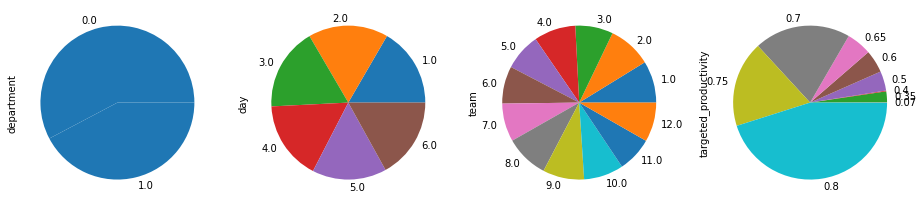

In [14]:
df.iloc[:, 1:5].apply(pd.Series.value_counts).plot.pie(subplots=True, layout=(2, 5), figsize=(20, 10), sharex = False, legend = False)

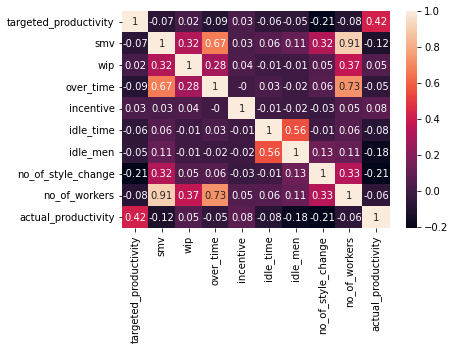

In [15]:
# correlation heat map to see the relationship
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [16]:
#Split into x and y
x= df.drop('actual_productivity',axis=1)
y= df['actual_productivity']

In [17]:
#Perform train test split
SEED = 888
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.2,random_state=SEED)

In [18]:
#Data normalization
standardizer = StandardScaler()
standardizer.fit(x_train)
x_train = standardizer.transform(x_train)
x_test = standardizer.transform(x_test)


In [19]:
#create layers and model
nIn = x_train.shape[1]
inputs = keras.Input(shape=(nIn,))
h1 = layers.Dense(100,activation='elu')
h2 = layers.Dense(50,activation='elu')
h3 = layers.Dense(25,activation='elu')
out_layer = layers.Dense(1)

x = h1(inputs)
x = h2(x)
x = h3(x)
outputs = out_layer(x)

model = keras.Model(inputs=inputs,outputs=outputs)

#compile model
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

#train model
BATCH_SIZE = 25
EPOCHS = 30
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=BATCH_SIZE,epochs=EPOCHS)

Epoch 1/30
39/39 [==============================] - 1s 7ms/step - loss: 0.2163 - mae: 0.3331 - val_loss: 0.0600 - val_mae: 0.1676
Epoch 2/30
39/39 [==============================] - 0s 3ms/step - loss: 0.0415 - mae: 0.1368 - val_loss: 0.0580 - val_mae: 0.1461
Epoch 3/30
39/39 [==============================] - 0s 3ms/step - loss: 0.0259 - mae: 0.1180 - val_loss: 0.0415 - val_mae: 0.1319
Epoch 4/30
39/39 [==============================] - 0s 4ms/step - loss: 0.0221 - mae: 0.1090 - val_loss: 0.0296 - val_mae: 0.1243
Epoch 5/30
39/39 [==============================] - 0s 3ms/step - loss: 0.0233 - mae: 0.1127 - val_loss: 0.0399 - val_mae: 0.1306
Epoch 6/30
39/39 [==============================] - 0s 3ms/step - loss: 0.0200 - mae: 0.1015 - val_loss: 0.0339 - val_mae: 0.1240
Epoch 7/30
39/39 [==============================] - 0s 3ms/step - loss: 0.0212 - mae: 0.1013 - val_loss: 0.0512 - val_mae: 0.1381
Epoch 8/30
39/39 [==============================] - 0s 3ms/step - loss: 0.0234 - mae: 0.10

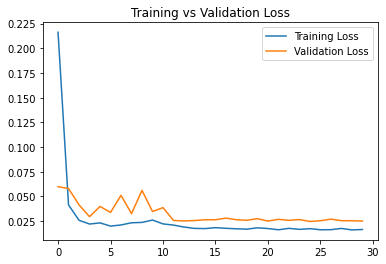

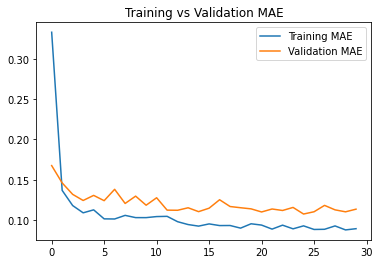

<Figure size 432x288 with 0 Axes>

In [20]:
#Visualization
import matplotlib.pyplot as plt

training_loss = history.history['loss']
val_loss = history.history['val_loss']
training_mae = history.history['mae']
val_mae = history.history['val_mae']
epochs_x_axis = history.epoch

plt.plot(epochs_x_axis,training_loss,label='Training Loss')
plt.plot(epochs_x_axis,val_loss,label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.legend()
plt.figure()

plt.plot(epochs_x_axis,training_acc,label='Training MAE')
plt.plot(epochs_x_axis,val_acc,label='Validation MAE')
plt.title("Training vs Validation MAE")
plt.legend()
plt.figure()

plt.show()

In [23]:
#Make prediction
predictions = model.predict(x_test)
pred_vs_label = np.concatenate((predictions,np.expand_dims(y_test, axis=1)),axis=1)
print(pred_vs_label)

[[0.80021119 0.80040196]
 [0.74137175 0.80014414]
 [0.70280653 0.99779221]
 [0.68815053 0.75021255]
 [0.52406001 0.50012336]
 [0.60346025 0.60027327]
 [0.6820004  0.70035455]
 [0.68771356 0.83838384]
 [0.4921343  0.55040351]
 [0.79093426 0.741     ]
 [0.73512161 0.67021605]
 [0.69170696 0.75005736]
 [0.70222831 0.68106061]
 [0.72410601 0.259375  ]
 [0.65519726 0.96410606]
 [0.79263008 0.664875  ]
 [0.63202792 0.54565767]
 [0.68116182 0.80011582]
 [0.74051708 0.80088889]
 [0.76802051 0.72233333]
 [0.64396602 0.3715625 ]
 [0.69732612 0.80002493]
 [0.6415484  0.59061728]
 [0.78043169 0.80012872]
 [0.62807328 0.70024649]
 [0.75841373 0.440375  ]
 [0.6184532  0.71441049]
 [0.54022908 0.48792   ]
 [0.71256495 0.49541667]
 [0.67024386 0.64998328]
 [0.79822582 0.5051282 ]
 [0.75787538 0.89545454]
 [0.71475977 1.0115625 ]
 [0.6862734  0.750608  ]
 [0.85458368 0.80072531]
 [0.4465431  0.40033279]
 [0.67154473 0.97186667]
 [0.7921828  0.8       ]
 [0.60154343 0.43799534]
 [0.94043565 0.97755556]


In [22]:
# source https://archive.ics.uci.edu/ml/machine-learning-databases/00597/